In [ ]:
!git clone https://github.com/TomBaran501/BDD_Boulangerie.git
path = "./BDD_Boulangerie/"

Cloning into 'BDD_Boulangerie'...
remote: Enumerating objects: 1432, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 1432 (delta 1), reused 15 (delta 1), pack-reused 1411
Receiving objects: 100% (1432/1432), 514.96 MiB | 43.99 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (1454/1454), done.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels. Si vous avez construit votre arborescence de la même manière que la mienne, et que vous adaptez les noms de labels à votre projet, alors le code suivant devrait être utilisable directement.

In [36]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=128):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1

    return x, y

Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [37]:
labels = ['baguette', 'croissant', 'painAuChocolat']

x_train, y_train = load_data(path, labels, dataset='train', image_size=128)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=128)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=128)
print(x_test.shape, y_test.shape)

(900, 128, 128, 3) (900, 1)
(142, 128, 128, 3) (142, 1)
(150, 128, 128, 3) (150, 1)


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

<ipython-input-13-87d8fde7827a>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[shuffle_indices[i]])])


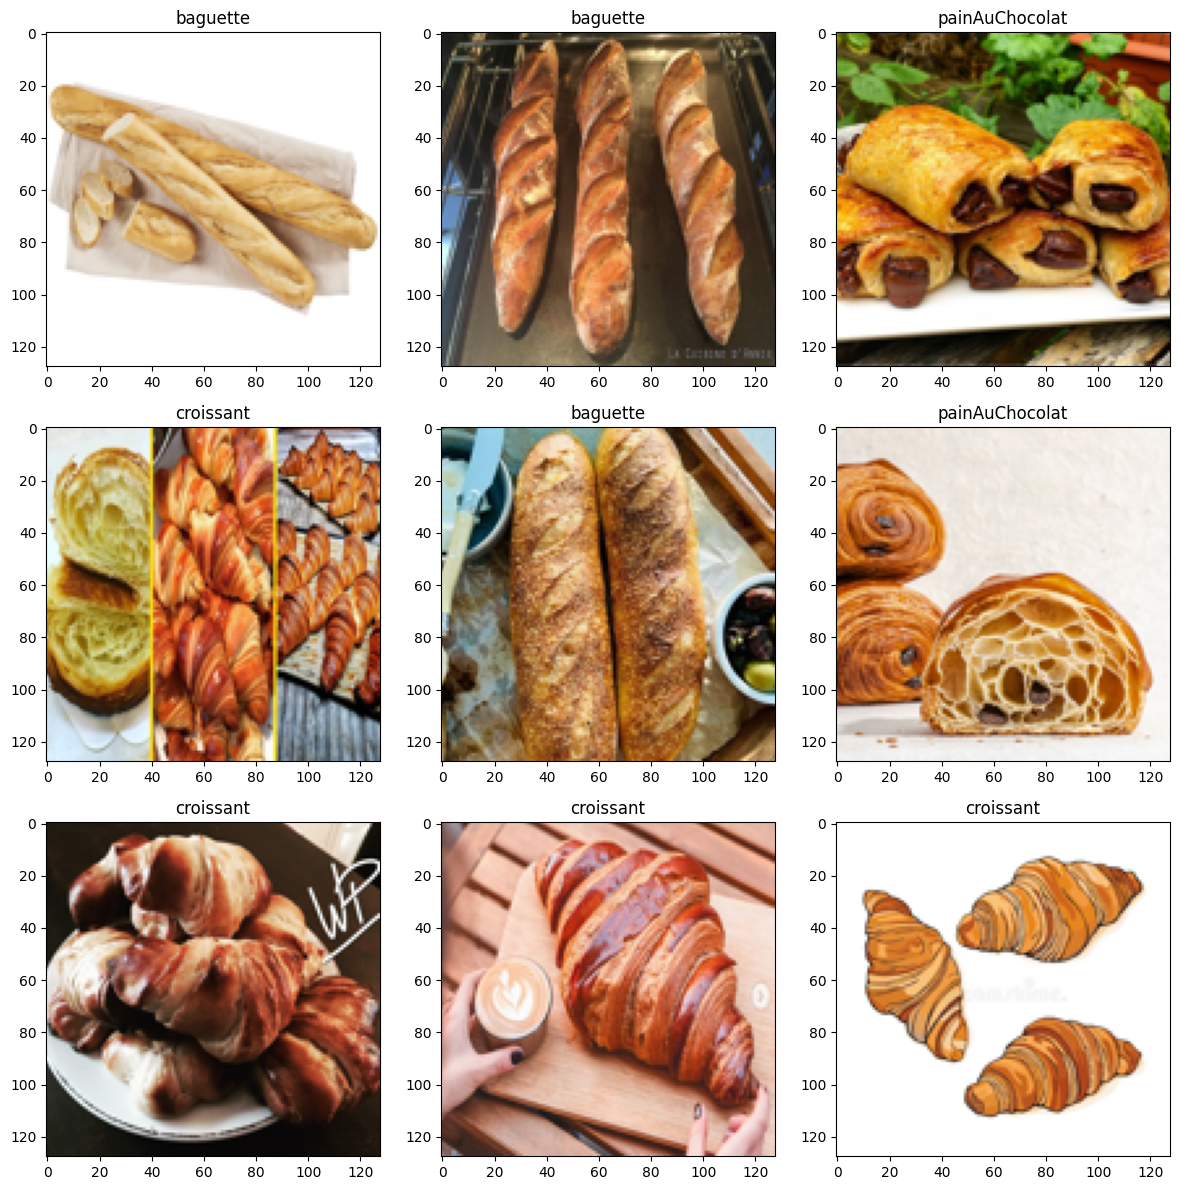

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(900)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [42]:
import tensorflow


import glob
import PIL
from PIL import Image
import numpy as np

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()
# A COMPLETER
# RECOPIER LE MODELE PRECEDENT


model.add(Conv2D(32,(3,3),activation = "relu",input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3), activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(96,(3,3) ,activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3), activation = "relu"))
model.add(MaxPooling2D())
# ...
model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense
model.add(Dense(512,activation ="relu",input_dim = (128,128,3)))  # Couche dense, à 512 neurones
model.add(Dense(3, "softmax"))   # Couche de sortie

model.summary()

# AJOUTER EGALEMENT LA FONCTION DE COUT
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=10,
                    validation_data=(x_val, y_val),
                    epochs=50,
                    )

print(y_train);

print(y_val);

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_68 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_69 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_70 (Conv2D)          (None, 28, 28, 96)        55392     
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 14, 14, 96)      

In [43]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

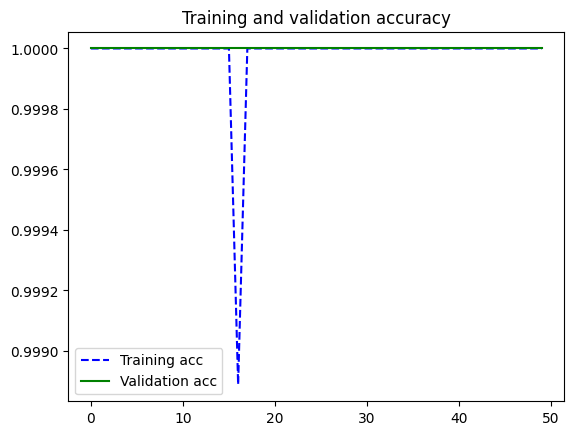

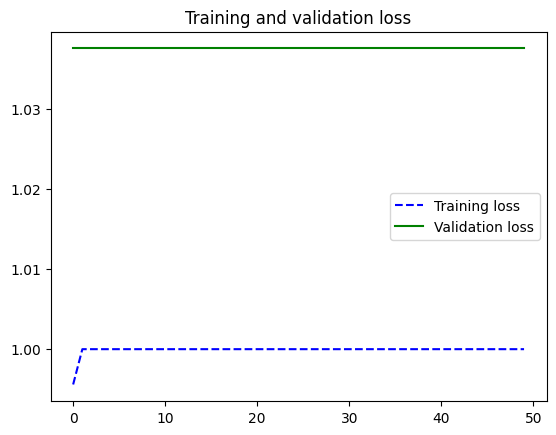

In [29]:
plot_training_analysis()